<a href="https://colab.research.google.com/github/ektaarora3501/Neural-Networks/blob/master/mnist_fashion_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import,division ,print_function,unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist =keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
class_name=['T-shirt/top','trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']


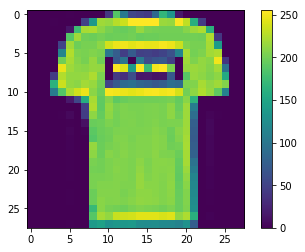

0


In [19]:
test_images.shape
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

print(train_labels[1])

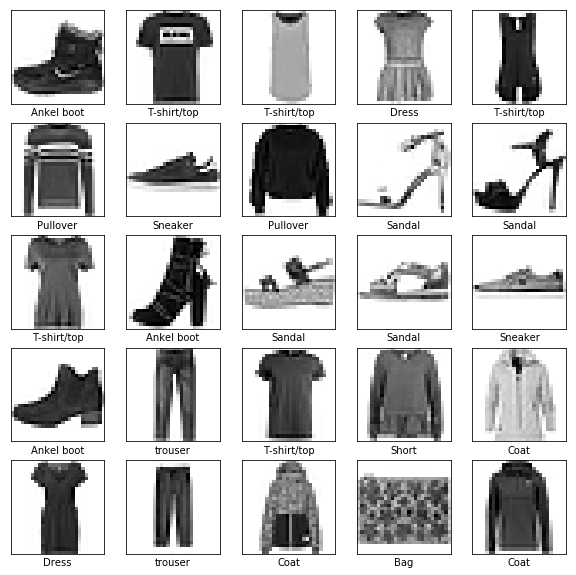

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_name[train_labels[i]])
plt.show()  

In [23]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

W0906 05:08:44.795538 140656768178048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Flatten format the input data from 2d array of 28x28 pixles to 1 d array of 784 pixles
Second dense function sets 128 nodes in second layer and next dense function create 10 node softmax layer 
it basically returns an array of 10 probability scores containing probability of a particular image belonging to a particular class

In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [30]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 3.4033 - acc: 0.6796
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7064 - acc: 0.7282
Epoch 3/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6363 - acc: 0.7606
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5814 - acc: 0.7807
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5747 - acc: 0.7872


In [34]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('test accuracy',test_acc)
predictions=model.predict(test_images)
print(predictions[0])

10000/10000 [==============================] - 0s 31us/sample - loss: 0.6002 - acc: 0.7787
test accuracy 0.7787
[3.0127729e-09 5.6492640e-12 5.3025732e-15 6.0679614e-11 8.8294884e-15
 1.7152241e-01 3.8867260e-11 1.7635487e-01 1.1922568e-08 6.5212274e-01]


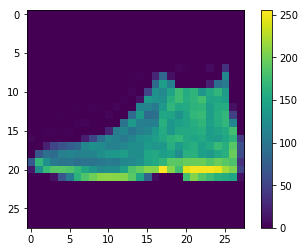

Ankel boot


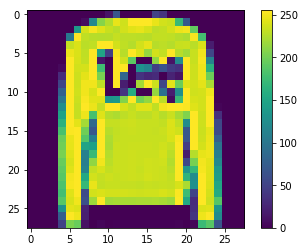

Coat


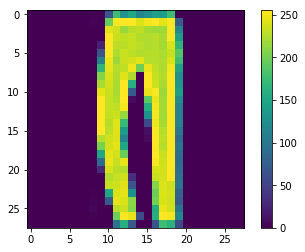

trouser


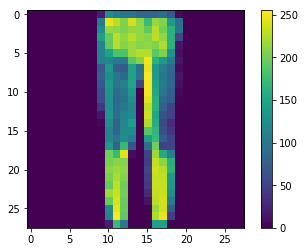

trouser


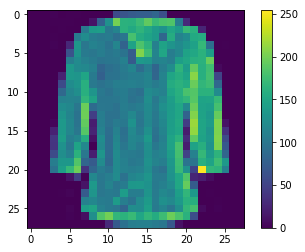

Pullover


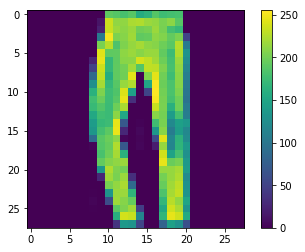

trouser


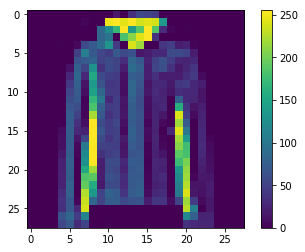

Shirt


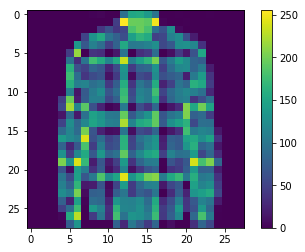

Coat


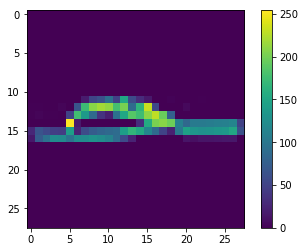

Sandal


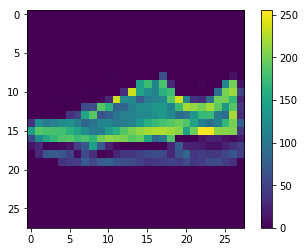

Sneaker


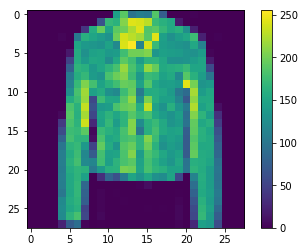

Coat


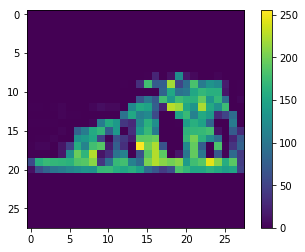

Sandal


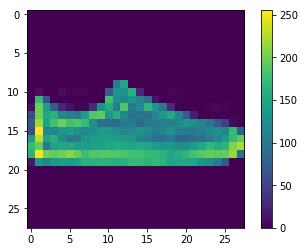

Sneaker


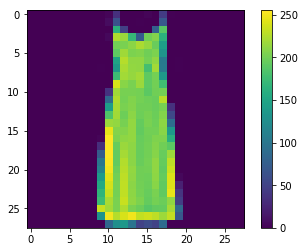

Dress


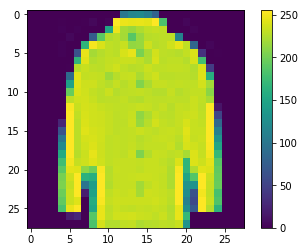

Coat


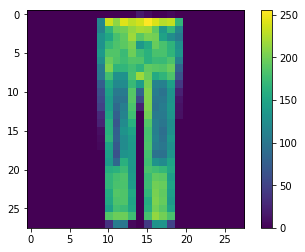

trouser


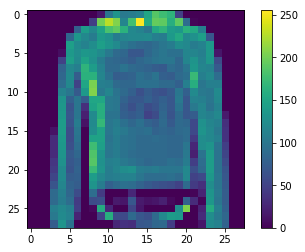

Pullover


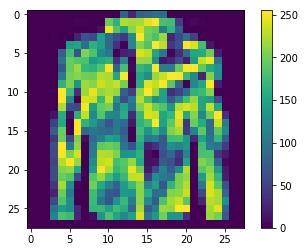

Coat


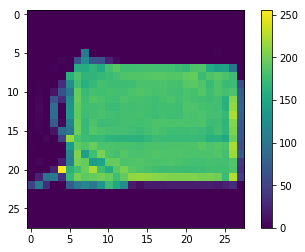

Bag


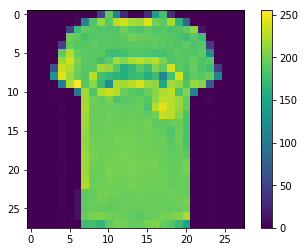

T-shirt/top


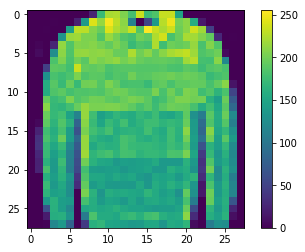

Pullover


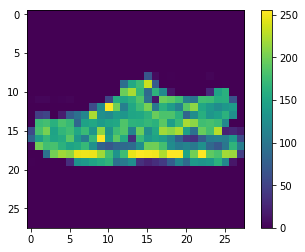

Sneaker


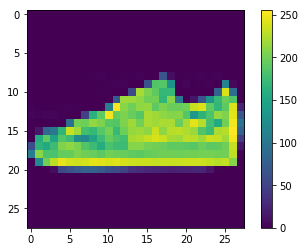

Sneaker


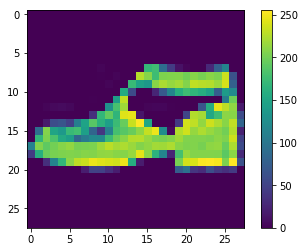

Sandal


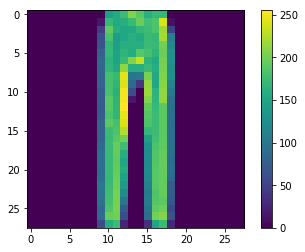

trouser


In [43]:
for j in range(25):
    plt.figure()
    plt.imshow(test_images[j])
    plt.colorbar()
    plt.grid(False)
    plt.show()
    m=max(predictions[j])
    for i in range(10):
        if m==predictions[j][i]:
            print(class_name[i])